# Develop a process to show the locations of the olive sided flycatcher clips in the filtered dataset.
https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3

In [1]:
# show path
import sys
sys.path.append('../../src/data/')
import clean_csv

In [5]:
import clean_csv
import pandas as pd
from pathlib import Path

### Step 1: load the cleaned dataframe from file

In [28]:
data_path = Path('../../data/')
df = pd.read_pickle(data_path / 'interim' / 'processed_metadata.pkl')
keep_cols = ['organization', 'project', 'project_id', 'location', 'location_id',
       'recording_date_time', 'recording_id', 'task_method', 'task_id',
       'aru_task_status', 'species_code', 'species_common_name',
       'species_scientific_name', 'species_class', 'detection_time',
       'task_duration', 'tag_duration', 'min_tag_freq', 'max_tag_freq',
       'tag_id', 'individual_order', 'vocalization', 'abundance', 'tag_rating',
       'tag_is_verified', 
       'verifier_id','media_url', 'clip_url', 'sensorId', 'tasks',
       'status', 'recording_url', 'file_type']
df = df[keep_cols]
df.tail()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,tag_rating,tag_is_verified,verifier_id,media_url,clip_url,sensorId,tasks,status,recording_url,file_type
1209410,BU,Zeller Woodpeckers- Time of Day,1241,Y-31-333-NE,43788,2017-05-03 05:36:00,480313,nan,442071,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209413,BU,Zeller Woodpeckers- Time of Day,1241,Y-31-333-NE,43788,2017-05-03 05:36:00,480313,nan,442071,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209414,BU,Zeller Woodpeckers- Time of Day,1241,Y-31-333-NE,43788,2017-05-03 05:36:00,480313,nan,442071,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209417,BU,Zeller Woodpeckers- Time of Day,1241,Y-39-414-B2,43941,2016-05-15 05:51:00,480560,nan,442318,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac
1209424,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303,2018-06-17 06:05:00,480596,nan,442354,Transcribed,...,NaN,f,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac


In [36]:
df.location_id.value_counts()

location_id
98882     8409
32109     1239
58369      986
308712     691
457        667
          ... 
46305        1
46323        1
46324        1
46325        1
35185        1
Name: count, Length: 12871, dtype: int64

### step 2: load the location data

In [34]:
# load the data from data_path/raw/locations.csv:

location_data = pd.read_csv(data_path / 'raw' / 'BU_locations_202328.csv')
location_data.loc[location_data.internal_wildtrax_id == 43788]

,location,latitude,longitude,elevationMeters,bufferRadiusMeters,isHidden,trueCoordinates,comments,internal_wildtrax_id,internal_update_ts
16864,y-31-333-ne,55.90333,-110.557684,NaN,NaN,Visible,t,NaN,43788,2021-03-24 09:39:18


It looks as though the internal_wildtrax_id in BU_locations and the location_id in training data csv are the same.
Join the tables together so that each item in the dataset also gets a lat long. 

In [37]:
location_data = location_data[['latitude', 'longitude', 'internal_wildtrax_id']]

In [38]:
# join location_data with df so that df contains lat long coordinates
df = df.merge(location_data, how='left', left_on='location_id', right_on='internal_wildtrax_id')


In [41]:
df.head(2)

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,media_url,clip_url,sensorId,tasks,status,recording_url,file_type,latitude,longitude,internal_wildtrax_id
0,BU,2023 Playback Experiment,2070,H23-CC-197-D1,483764,2023-06-02 15:51:51,829449,nan,813094,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,55.111081,-115.235705,483764.0
1,BU,2023 Playback Experiment,2070,H23-CC-197-D1,483764,2023-06-02 15:51:51,829449,nan,813094,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,55.111081,-115.235705,483764.0


<Axes: xlabel='longitude', ylabel='latitude'>

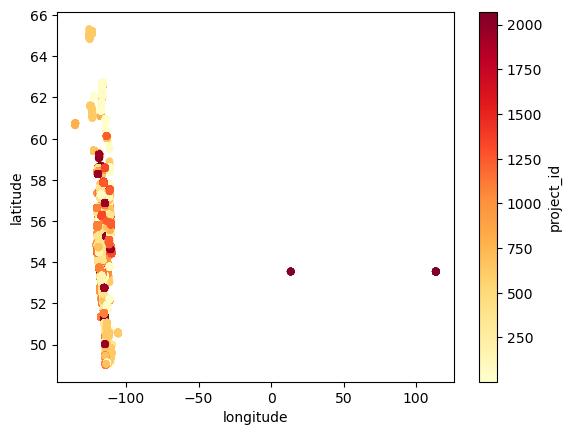

In [43]:
df.plot(x='longitude', y='latitude', kind='scatter', c='project_id', colormap='YlOrRd', )

In [50]:
len(df.loc[df.longitude == df.longitude.max()]), df.longitude.max()

(118, 113.4937)

118 samples are outliers whose longitude coordinate might be missing a minus sign. 

In [54]:
sum(df.longitude == -113.4937)

0

There aren't any other longitudes at -113.4937 though. Investigate further.

In [55]:
df.longitude.describe()

count    293672.000000
mean       -114.396540
std           5.628954
min        -135.166410
25%        -117.542010
50%        -113.481770
75%        -111.402096
max         113.493700
Name: longitude, dtype: float64

In [112]:
df.loc[df.project == 'CWS-Ontario Birds of James Bay Lowlands 2021 (Resample)'].head()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,media_url,clip_url,sensorId,tasks,status,recording_url,file_type,latitude,longitude,internal_wildtrax_id
192259,CWS-ONT,CWS-Ontario Birds of James Bay Lowlands 2021 (...,1271,P05-1,193721,2021-05-30 04:52:00,291439,1SPT,444817,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,ARU,188,Published - Public,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,mp3,NaN,NaN,NaN
192260,CWS-ONT,CWS-Ontario Birds of James Bay Lowlands 2021 (...,1271,P05-1,193721,2021-05-30 04:52:00,291439,1SPT,444817,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,ARU,188,Published - Public,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,mp3,NaN,NaN,NaN
192261,CWS-ONT,CWS-Ontario Birds of James Bay Lowlands 2021 (...,1271,P05-1,193721,2021-05-30 04:52:00,291439,1SPT,444817,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,ARU,188,Published - Public,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,mp3,NaN,NaN,NaN
192262,CWS-ONT,CWS-Ontario Birds of James Bay Lowlands 2021 (...,1271,P05-1,193721,2021-05-30 04:52:00,291439,1SPT,444817,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,ARU,188,Published - Public,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,mp3,NaN,NaN,NaN
192263,CWS-ONT,CWS-Ontario Birds of James Bay Lowlands 2021 (...,1271,P05-1,193721,2021-05-30 04:52:00,291439,1SPT,444817,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,ARU,188,Published - Public,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,mp3,NaN,NaN,NaN


In [78]:
df.loc[df.longitude == 113.4937].head()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,media_url,clip_url,sensorId,tasks,status,recording_url,file_type,latitude,longitude,internal_wildtrax_id
336,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
337,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
338,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
339,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0
340,BU,2023 Playback Experiment,2070,TRACK10,483768,2023-09-14 13:00:00,829459,nan,813103,Transcribed,...,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,114,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,53.5461,113.4937,483768.0


These anomalous locations come from the 2023 Playback Experiment project. 

Details from WildTrax: The purpose is to compare perceptibility and amplitude of several bird songs at varying distances given denser or open forests. The playback was completed during the bird breeding season in 2023 by the BU field crew across the province in a variety of forested conditions.
Each location has a maximum of three playbacks. The distance of the playback is added at the end of the location name, eg: BAM22-138-34m indicates the bird songs are played toward the ARU 34m away at site BAM22-138.

Given that these are playback experimetns, they should be dropped from the database during the cleaning process. 

In [86]:
# Drop the 2023 playback experiment from the dataframe
df.drop(df.loc[df.project_id == 2070].index, inplace=True)

In [113]:
df.species_code.astype()

454       OVEN
455       LINO
456       OVEN
457       LIWI
458       LINO
          ... 
550287    PIWO
550288    PIWO
550289    PIWO
550290    YBSA
550291    PIWO
Name: species_code, Length: 549838, dtype: object

<Axes: xlabel='longitude', ylabel='latitude'>

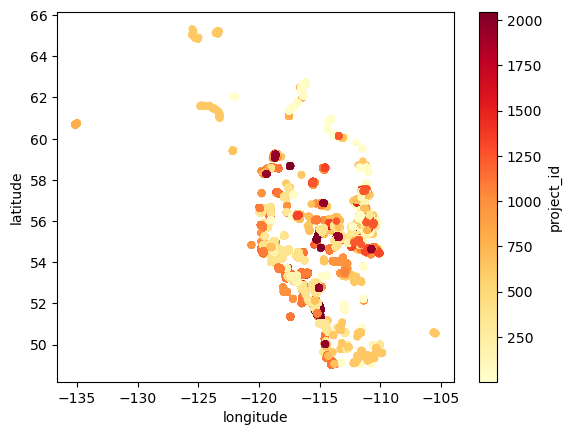

In [115]:
df.plot(x='longitude', y='latitude', kind='scatter', c='project_id',colormap='YlOrRd', )

Looks like it could be AB. Let's add a map. 

In [60]:
!conda install geopandas -y
import geopandas as gpd

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/mikeg/miniforge3/envs/osfl2

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    c-ares-1.20.1              |       h93a5062_1         100 KB  conda-forge
    cairo-1.18.0               |       hd1e100b_0         877 KB  conda-forge
    cfitsio-4.3.0              |       hca87796_0         768 KB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1          10 KB  conda-forge
    fiona-1.9.5                |  py310h40eb463_0         815 KB  conda-forge
    folium-0.14.0              |     pyhd8ed1ab_0          71 KB  conda-forge
    fonts-conda-ecosystem-1    |           

In [61]:
import geopandas as gpd


In [88]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_15069/1771207407.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

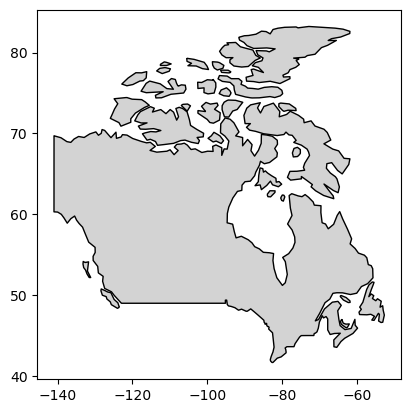

In [89]:
countries[countries.name=='Canada'].plot(color='lightgrey', edgecolor='black')

In [148]:
import matplotlib.pyplot as plt

def display_clip_locations(df, title = 'clip_locations'):
        # initialize an axis
        fig, ax = plt.subplots(figsize=10,10)# plot map on axis
        countries = gpd.read_file(  
        gpd.datasets.get_path("naturalearth_lowres"))
        countries[countries["name"] == "Canada"].plot(color="lightgrey",ax=ax)
        # plot points
        df.plot(x="longitude", y="latitude", kind="scatter", 
         s=0.3, alpha=0.1, c="red",
                title=title, 
                ax=ax)
        # add grid
        ax.grid(alpha=0.5)
        plt.show()

SyntaxError: positional argument follows keyword argument (1277261077.py, line 7)

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_15069/2416958402.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


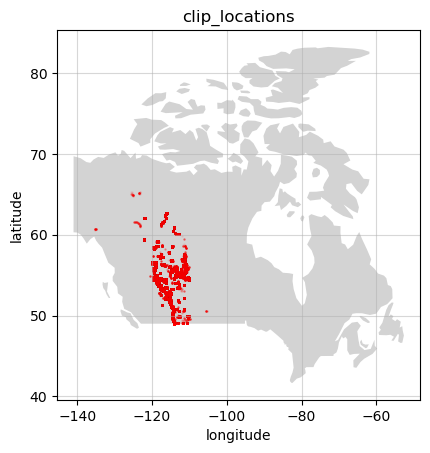

In [149]:
display_clip_locations(df)

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_15069/2416958402.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


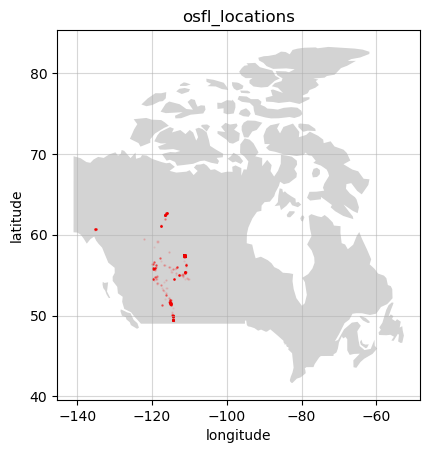

In [150]:
osfls  = df.loc[df.species_code == 'OSFL']
display_clip_locations(osfls, title='osfl_locations')